# DESAFIO
## Problema

Fomos abordados por um cliente que tem um processo industrial que transforma matéria-prima em
peças. Uma visão geral do processo é dada na figura abaixo. A saída do processo, representada
pela variável PESO_PECA, pode ser interpretada como o peso médio do lote de peças produzido.
Além disso, temos 3 variáveis de processo: QTD_MAT_PRIMA, VAR_1 e VAR_2. **A única
variável que podemos controlar é QTD_MAT_PRIMA, a quantidade de matéria-prima na entrada
do processo**. As outras duas variáveis não são controláveis por motivos diversos e não têm
significado físico evidente.

O cliente mostrou preocupação com o controle de qualidade do seu processo industrial. **O peso de
uma peça deve ser de 100 gramas**. Normas de qualidade estabelecem um limite de variação do
peso da peça de 10% somente para baixo. **Ou seja, se uma peça pesar menos que 90 gramas, ela é
considerada não-conforme e descartada**. Não há nenhuma norma estabelecendo um limite superior
para o peso das peças, porém os custos de produção aumentam à medida que peças acima do peso
são produzidas. O gerente da qualidade da empresa compartilhou com a equipe uma métrica de
custo empregada para medir a eficiência do processo, mostrada na figura abaixo. **O custo é mínimo
no peso esperado das peças de 100 gramas e aumenta abruptamente à medida que o peso se
aproxima de 90 gramas**, para modelar o descarte de peças. Além disso, o custo também aumenta
com o excesso de peso, apesar deste aumento ser mais suave.

A métrica de custo C(p) relaciona-se com o peso p das peças segundo a seguinte fórmula:

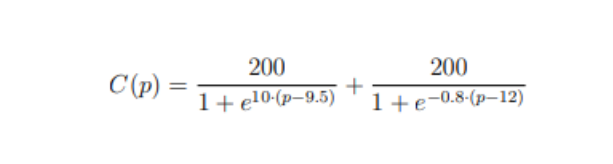

O grande problema enfrentado pelo cliente é a variabilidade no processo. Nas palavras do gerente
da qualidade:

**"Estamos tendo dificuldade para modelar nosso processo industrial. As diferentes variáveis de
processo impactam de maneira diferente o peso final das peças, além de introduzir diferentes
níveis de incerteza no processo. Não estamos conseguindo lidar com esta incerteza."**

Para ilustrar seu ponto, o gerente mostrou duas comparações. Na primeira tabela, temos o valor da
variável PESO_PECA para a mesma quantidade da variável QTD_MAT_PRIMA, mas para
diferentes valores de VAR_1 e VAR_2, ilustrando o impacto das variáveis não controláveis no
processo. Além disso, para ilustrar a incerteza no processo, o cliente exibiu o valor da variável
PECO_PECA para diferentes rodadas de produção com as variáveis QTD_MAT_PRIMA, VAR 1
e VAR 2 fixas, mostrado seguna tabela.

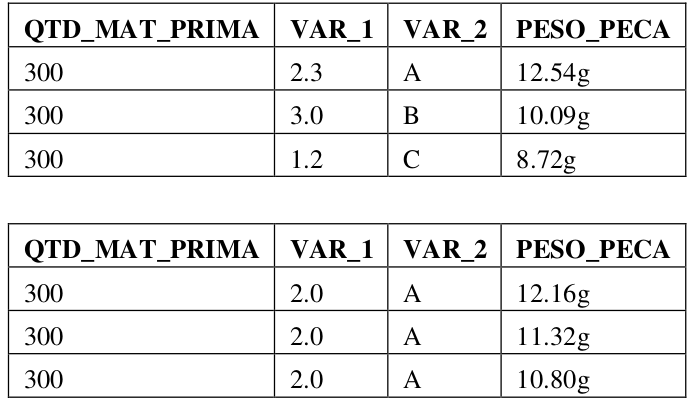

O objetivo do cliente com este projeto é identificar pontos de melhoria no processo, além de obter
um plano de produção (valores ótimos da quantidade de matéria-prima QTD_MAT_PRIMA)
visando a minimização da métrica de custo. Foi fornecida uma tabela com 500 registros de
produção, mapeando o peso da peça para diversas condições de produção, disponível em anexo.

# Analise Descritiva

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:

registros = pd.read_excel('registros-prod.xlsx')
registros.head()

,QTD_MAT_PRIMA,VAR_1,VAR_2,PESO_PECA
0,320.15,0.88,A,10.144919
1,320.14,1.55,A,11.547027
2,284.85,2.97,A,11.112109
3,263.92,2.36,C,9.900123
4,276.22,2.98,C,10.079822


In [3]:
registros.describe()

,QTD_MAT_PRIMA,VAR_1,PESO_PECA
count,500.000000,500.000000,500.000000
mean,291.264600,2.098180,10.395002
std,45.182499,0.711166,1.572233
min,112.910000,0.050000,4.543124
25%,259.267500,1.630000,9.425819
50%,295.450000,2.300000,10.334273
75%,325.137500,2.672500,11.379932
max,436.070000,2.980000,17.362728


In [4]:
# Identificando a presença de valores nulos

registros.isnull().sum()



QTD_MAT_PRIMA    0
VAR_1            0
VAR_2            0
PESO_PECA        0
dtype: int64

In [5]:
# Quais variaveis são categóricas?

registros.dtypes


QTD_MAT_PRIMA    float64
VAR_1            float64
VAR_2             object
PESO_PECA        float64
dtype: object

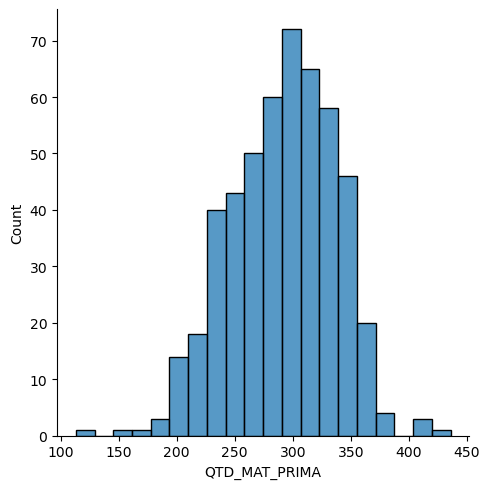

In [7]:
# Entendendo a distribuição da variável QTD_MAT_PRIMA
sns.displot(registros['QTD_MAT_PRIMA'])
plt.show()

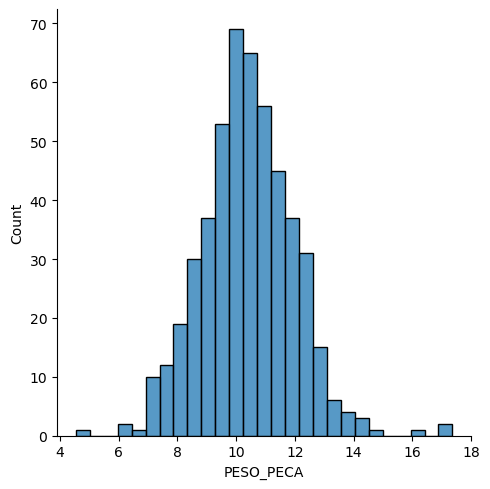

In [8]:
# Entendendo a distribuição da variável Peso_Peca   
sns.displot(registros['PESO_PECA'])

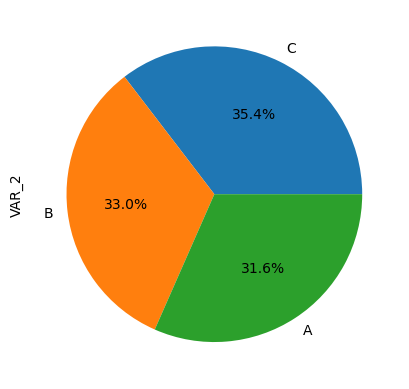

In [ ]:
# grafico de setores para a variável VAR_2

registros['VAR_2'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()



# Analise Diagnostica

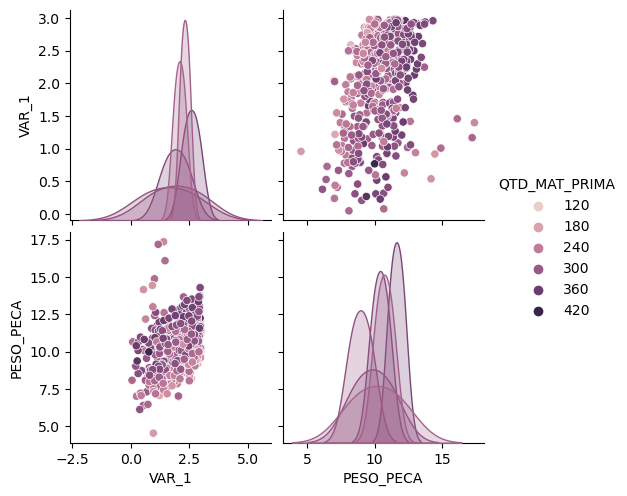

/tmp/ipykernel_6668/3091957589.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = registros.corr()


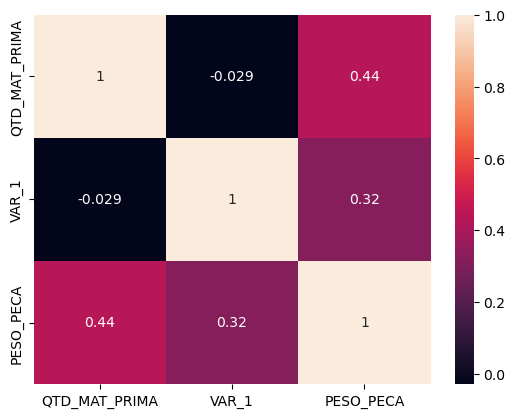

In [ ]:
# Identicando a distribuição dos dados
sns.pairplot(registros, hue='QTD_MAT_PRIMA', diag_kind='kde')
plt.show()

# Identificando a correlação entre as variáveis

correlacao = registros.corr()
sns.heatmap(correlacao, annot=True)
plt.show()


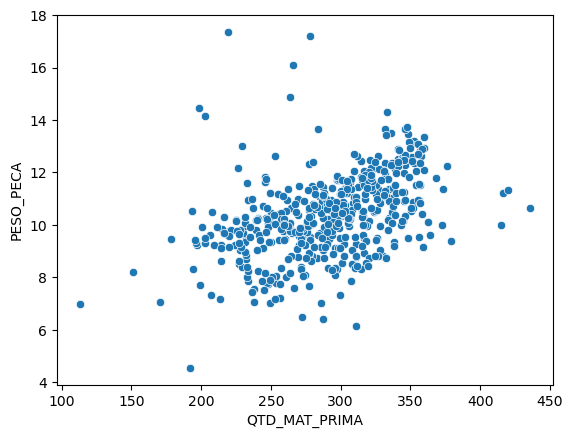

In [9]:
# Correlação entre as variáveis QTD_MAT_PRIMA e PESO_PECA

sns.scatterplot(x='QTD_MAT_PRIMA', y='PESO_PECA', data=registros)
plt.show()



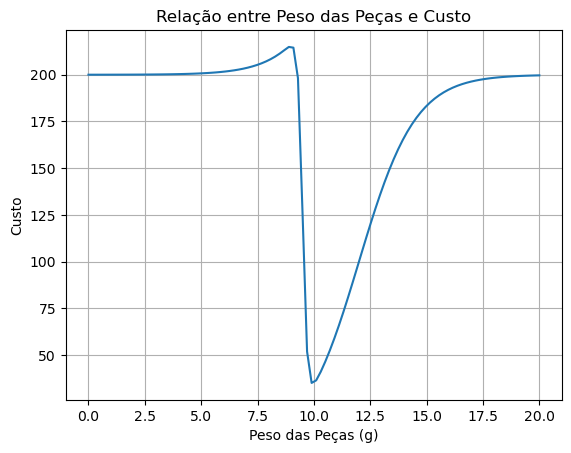

In [10]:
# Metrica de custo por peça
# Função de custo

def custo(p):
    return 200 / (1 + np.exp(10 * (p - 9.5))) + 200 / (1 + np.exp(-0.8 * (p - 12)))

# Gerar valores de peso das peças
peso = np.linspace(0, 20, 100)  # Vamos considerar pesos de 0 a 20 gramas

# Calcular o custo para cada valor de peso
custo_peso = custo(peso)

# Plotar o gráfico
plt.plot(peso, custo_peso)
plt.xlabel('Peso das Peças (g)')
plt.ylabel('Custo')
plt.title('Relação entre Peso das Peças e Custo')
plt.grid(True)
plt.show()

In [11]:
# Calculando o custo para cada peça
registros['CUSTO'] = custo(registros['PESO_PECA'])
registros.head()




,QTD_MAT_PRIMA,VAR_1,VAR_2,PESO_PECA,CUSTO
0,320.15,0.88,A,10.144919,37.278717
1,320.14,1.55,A,11.547027,82.076805
2,284.85,2.97,A,11.112109,65.905963
3,263.92,2.36,C,9.900123,35.014600
4,276.22,2.98,C,10.079822,36.024115


In [12]:
# consulta de registros com custo maior que 100 

custo_maior = registros[registros['CUSTO'] > 100]

custo_maior




,QTD_MAT_PRIMA,VAR_1,VAR_2,PESO_PECA,CUSTO
6,283.19,1.85,B,8.722600,213.464119
8,227.67,2.45,C,9.036513,215.162674
12,316.43,2.96,A,12.049646,101.985570
15,354.18,2.17,A,12.053334,102.133034
19,197.22,2.86,C,9.226055,207.471645
...,...,...,...,...,...
492,341.39,2.48,A,12.399139,115.831280
496,331.41,2.60,A,12.048504,101.939930
497,311.08,0.38,C,6.128060,201.807038
498,315.56,1.89,B,9.198321,209.885117


/tmp/ipykernel_6668/851644593.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = registros.corr()


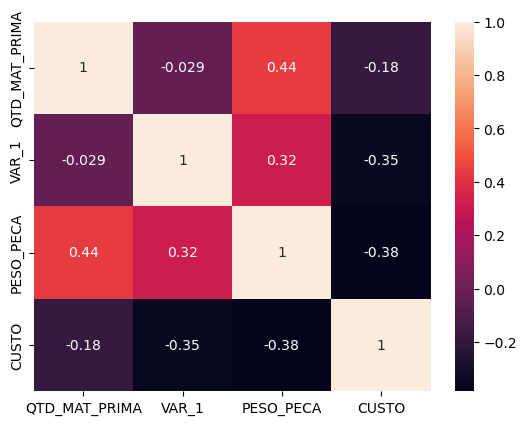

In [13]:
# Identificando a correlação entre as variáveis
correlacao = registros.corr()
sns.heatmap(correlacao, annot=True)
plt.show()

In [14]:
registros.PESO_PECA.describe()


count    500.000000
mean      10.395002
std        1.572233
min        4.543124
25%        9.425819
50%       10.334273
75%       11.379932
max       17.362728
Name: PESO_PECA, dtype: float64

<Axes: xlabel='QTD_MAT_PRIMA', ylabel='PESO_PECA'>

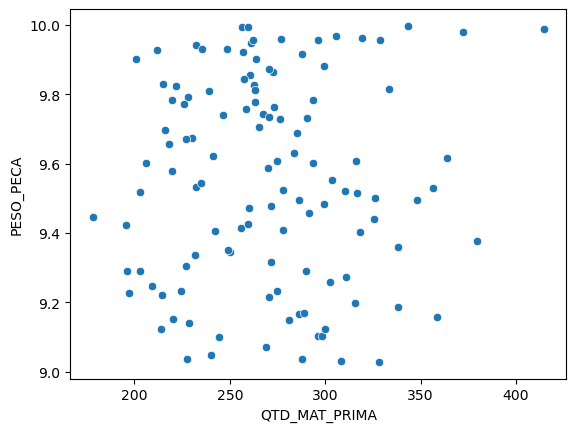

In [15]:
# Peso das peças entre 90 e 100 gramas

registros[(registros['PESO_PECA'] >= 9) & (registros['PESO_PECA'] <= 10)]

# grafico das peças entre 9 e 10 gramas e a quantidade de matéria prima utilizada

sns.scatterplot(x='QTD_MAT_PRIMA', y='PESO_PECA', data=registros[(registros['PESO_PECA'] >= 9) & (registros['PESO_PECA'] <= 10)])



In [16]:
# dentro do intervalo de 90 a 100 gramas, qual a quantidade de matéria prima mais utilizada?

registros[(registros['PESO_PECA'] >= 9) & (registros['PESO_PECA'] <= 10)]['QTD_MAT_PRIMA'].value_counts()



263.92    1
348.18    1
303.38    1
263.39    1
271.53    1
         ..
298.32    1
302.73    1
232.18    1
356.42    1
315.56    1
Name: QTD_MAT_PRIMA, Length: 118, dtype: int64

In [17]:
# Novo dataset com as peças entre 9 e 10 gramas

peca_9_10 = registros[(registros['PESO_PECA'] >= 9) & (registros['PESO_PECA'] <= 10)]


In [20]:
peca_9_10.head()

,QTD_MAT_PRIMA,VAR_1,VAR_2,PESO_PECA,CUSTO
3,263.92,2.36,C,9.900123,35.014600
7,274.96,2.33,C,9.607203,76.704454
8,227.67,2.45,C,9.036513,215.162674
10,262.60,2.85,C,9.826068,37.273322
11,319.19,2.34,B,9.963041,34.709253


In [21]:
# Simplex para otimização do custo

from scipy.optimize import linprog

# Coeficientes da função objetivo

c = peca_9_10['CUSTO']

# Coeficientes das restrições

A = peca_9_10[['QTD_MAT_PRIMA', 'PESO_PECA']]

# Limites das restrições

b = [1000, 100]

# Limites das variáveis

x_bounds = (0, None)

# Executar o Simplex

resultado = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='simplex')

resultado




ValueError: Invalid input for linprog: A_ub must have exactly two dimensions, and the number of columns in A_ub must be equal to the size of c

In [ ]:
# Custo total

custo_total = resultado.fun

# Quantidade de peças

qtd_peca = resultado.x

custo_total, qtd_peca
